In [1]:
#Potrebne biblioteke
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Koristi gustinu kako bi izvršio klasterovanje. Moramo paziti na epsilon veličinu i broj tačaka. One određuju šta se smatra poželjnom gustinom. 

In [2]:
# Generisanje rendom podataka koriscenjem make_blobs()
centers = [[1, 1], [3, 3], [5, 7]]
X, labels_true = make_blobs(n_samples=200, centers=centers, cluster_std=0.4,
                            random_state=0)
#normalizacija
#X = StandardScaler().fit_transform(X)

In [3]:
#Pokretanje DBSCANa
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_

In [4]:
# Broj klastera
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print('Broj klastera: %d' % n_clusters)

Broj klastera: 3


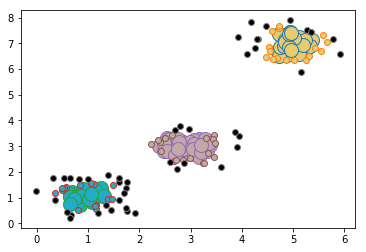

In [5]:
# Vizuelizacija
# -1 u labels je za vrednosti van granica, dok 0,1,...n-1 imaju oznaku u zavisnosti od klastera kom pripadaju

unique_labels = set(labels)

i = 0
colors = np.zeros((4,4))

while i <= len(unique_labels)-1:
    colors[i] = (np.random.rand(),np.random.rand(),np.random.rand(),1)
    i = i+1

for k, col in zip(unique_labels, colors):
    #crna boja za vrednosti van granica
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=14)

    xy = X[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=6)

plt.show()